In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [53]:
from google.colab import files
file = files.upload()

Saving Garis Parkiran Mobil.jpeg to Garis Parkiran Mobil.jpeg


In [54]:
ls

'Garis Parkiran Mobil.jpeg'   sample_data/   thumb-1920-1364024.jpeg   wolf.jpg


In [63]:
image = cv2.imread("Garis Parkiran Mobil.jpeg")

In [64]:
image_asli = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [65]:
blurred_frame = cv2.GaussianBlur(image, (5, 5), 0)
hsv = cv2.cvtColor(blurred_frame, cv2.COLOR_BGR2HSV)

In [66]:
lower_yellow = np.array([20, 100, 100], dtype=np.uint8)
upper_yellow = np.array([30, 255, 255], dtype=np.uint8)

In [67]:
mask = cv2.inRange(hsv, lower_yellow, upper_yellow)
edges = cv2.Canny(mask, 74, 150)
lines = cv2.HoughLinesP(edges, 1, np.pi / 100, 50, maxLineGap=50)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 10)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

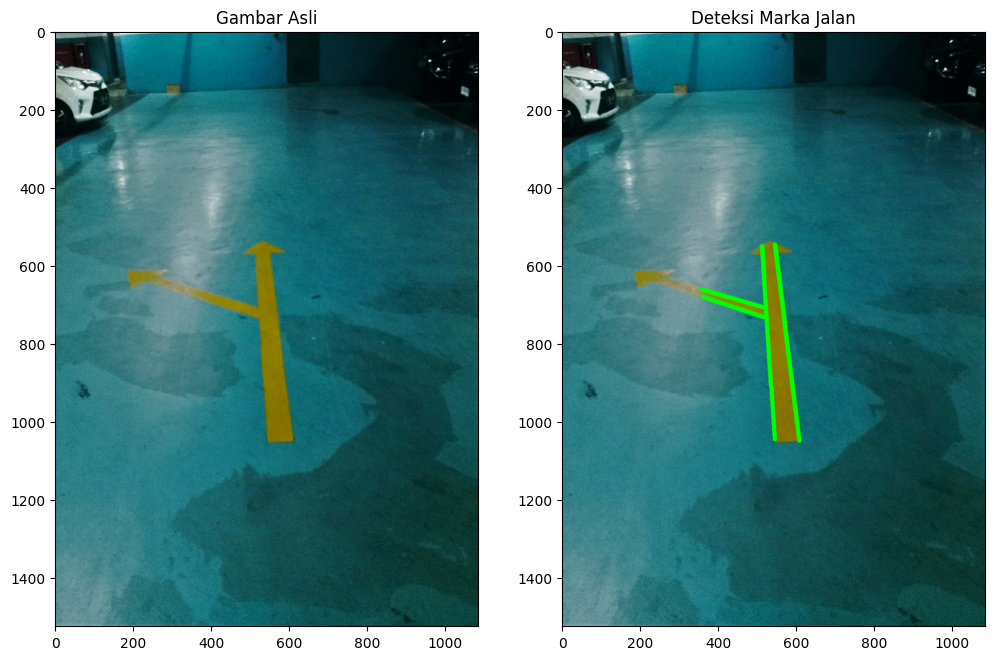

In [68]:
Fig, ax = plt.subplots(1, 2, figsize=(12, 10))
ax[0].imshow(image_asli)
ax[0].set_title('Gambar Asli')

ax[1].imshow(image_rgb)
ax[1].set_title('Deteksi Marka Jalan')

plt.show()